In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2

Using TensorFlow backend.


In [2]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [4]:
test1 = get_data('chest_xray/test')
test2= get_data('chest_xray/test2')
test3 = get_data('chest_xray/test3')

<AxesSubplot:ylabel='count'>

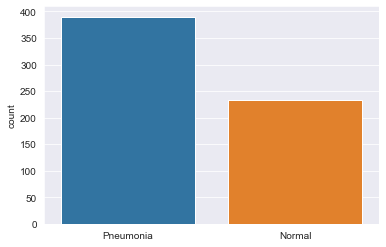

In [7]:
graph = []
for i in test1:
    if(i[1] == 0):
        graph.append("Pneumonia")
    else:
        graph.append("Normal")
sns.set_style('darkgrid')
sns.countplot(graph)      


In [15]:
x_test = []
y_test = []

for feature, label in test1:
    x_test.append(feature)
    y_test.append(label)
    
x_test = np.array(x_test) / 255
x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [16]:
reconstructed_model = keras.models.load_model("models/best_model1")

In [17]:
predictions2 = reconstructed_model.predict_classes(x_test)
predictions2 = predictions2.reshape(1,-1)[0]
predictions2[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
print(classification_report(y_test, predictions2, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.89      0.99      0.94       390
   Normal (Class 1)       0.98      0.79      0.88       234

           accuracy                           0.92       624
          macro avg       0.94      0.89      0.91       624
       weighted avg       0.92      0.92      0.91       624



<AxesSubplot:>

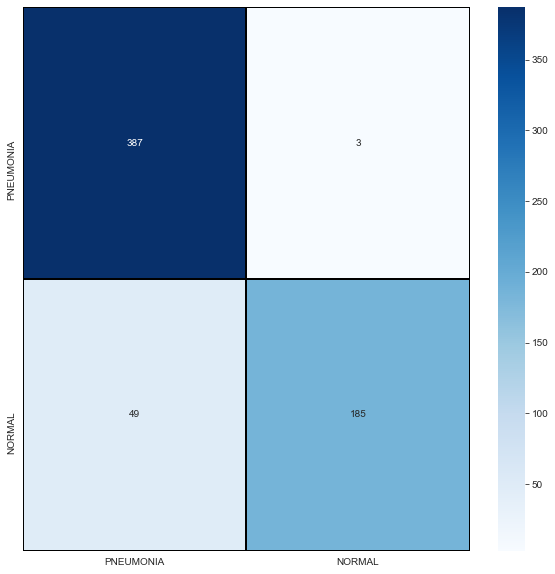

In [19]:
cm2= confusion_matrix(y_test,predictions2)
cm2 = pd.DataFrame(cm2 , index = ['0','1'] , columns = ['0','1'])
plt.figure(figsize = (10,10))
sns.heatmap(cm2,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

Our test1 dataset did really well!!! Let's see the rest of the other datasets we got

In [20]:
x_test = []
y_test = []

for feature, label in test2:
    x_test.append(feature)
    y_test.append(label)
    
x_test = np.array(x_test) / 255
x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [21]:
predictions2 = reconstructed_model.predict_classes(x_test)
predictions2 = predictions2.reshape(1,-1)[0]
predictions2[:15]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [22]:
print(classification_report(y_test, predictions2, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.58      0.12      0.19        94
   Normal (Class 1)       0.51      0.91      0.65        94

           accuracy                           0.52       188
          macro avg       0.54      0.52      0.42       188
       weighted avg       0.54      0.52      0.42       188



<AxesSubplot:>

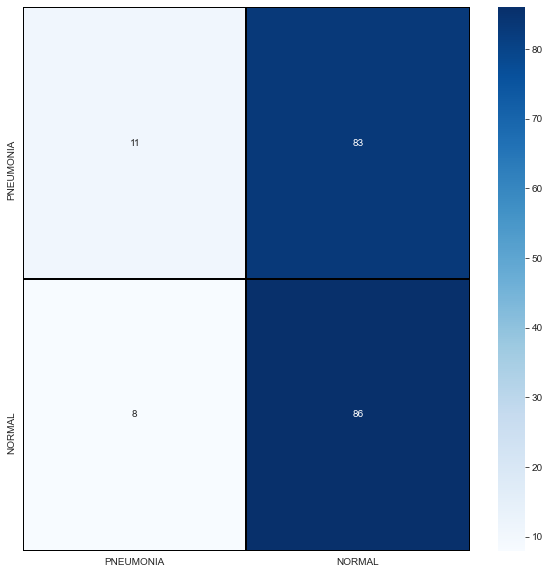

In [23]:
cm2= confusion_matrix(y_test,predictions2)
cm2 = pd.DataFrame(cm2 , index = ['0','1'] , columns = ['0','1'])
plt.figure(figsize = (10,10))
sns.heatmap(cm2,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

Our model did really bad in these datasets! Oh no! It couldbe because of the way the x-rays look like, they not as clear and are more fuzzy!

In [24]:
reconstructed_model = keras.models.load_model("models/data_augmentation_model")

In [25]:
predictions2 = reconstructed_model.predict_classes(x_test)
predictions2 = predictions2.reshape(1,-1)[0]
predictions2[:15]

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0])

In [26]:
print(classification_report(y_test, predictions2, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.62      0.45      0.52        94
   Normal (Class 1)       0.57      0.72      0.64        94

           accuracy                           0.59       188
          macro avg       0.59      0.59      0.58       188
       weighted avg       0.59      0.59      0.58       188



Interesting our data augmentation model did better on this unseen dataset rather than our best model

In [27]:
reconstructed_model = keras.models.load_model("models/new_data_model")

In [28]:
predictions2 = reconstructed_model.predict_classes(x_test)
predictions2 = predictions2.reshape(1,-1)[0]
predictions2[:15]

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0])

In [29]:
print(classification_report(y_test, predictions2, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.49      0.31      0.38        94
   Normal (Class 1)       0.50      0.68      0.57        94

           accuracy                           0.49       188
          macro avg       0.49      0.49      0.48       188
       weighted avg       0.49      0.49      0.48       188

